## Import thư viện

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import re
from datetime import datetime

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
user_course = pd.read_csv("/kaggle/input/fork-of-user-course-final/user_course_final.csv")
user_course

,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65
1,U_1000129,云南民族大学,C_1925903,2020-09-06,0,0.0,56,31,7,[],0,1,1.0,70.0,30.0,0.0,1.0,0,2020-08-12,2020-12-31,141.0,116
2,U_1000129,云南民族大学,C_1992970,2020-09-06,1,0.0,80,28,7,[],0,0,1.0,70.0,30.0,0.0,1.0,0,2020-08-27,2020-12-31,126.0,116
3,U_1000129,云南民族大学,C_680884,2020-10-16,2,960.0,63,6,6,[],0,0,1.0,80.0,20.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,76
4,U_1000342,云南民族大学,C_697791,2020-02-28,0,0.0,114,48,8,['计算机科学与技术'],1,0,0.0,80.0,20.0,0.0,1.0,0,2020-01-20,2020-07-31,193.0,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459723,U_999821,北京科技大学,C_1774965,2020-05-02,4,1968.0,44,4,4,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-04-27,2021-08-31,491.0,486
2459724,U_999856,北京科技大学,C_696724,2020-02-23,0,0.0,86,60,21,['数学'],1,2,1.0,80.0,20.0,0.0,1.0,0,2019-11-18,2020-02-29,103.0,6
2459725,U_999856,北京科技大学,C_696827,2020-02-25,1,48.0,43,52,9,['数学'],1,1,1.0,70.0,30.0,0.0,1.0,0,2019-12-25,2020-03-31,97.0,35
2459726,U_999856,北京科技大学,C_947252,2020-03-01,2,120.0,56,7,8,[],0,0,1.0,55.0,10.0,35.0,1.0,1,2020-02-17,2020-07-31,165.0,152


In [4]:
user_course['num_field_x'].value_counts()

num_field_x
0    2046206
1     353111
2      60411
Name: count, dtype: int64

In [5]:
course_final_exam = pd.read_csv("/kaggle/input/course-with-exam/final_course_exam.csv")
course_final_exam

,Unnamed: 0,id,exam_resources
0,0,C_1073350,"['Ex_1650729', 'Ex_1650730']"
1,1,C_1714443,['Ex_3625291']
2,2,C_1718815,['Ex_4974697']
3,3,C_1721804,"['Ex_3742687', 'Ex_3742688']"
4,4,C_1724283,['Ex_3800298']
...,...,...,...
373,373,C_948114,"['Ex_1467099', 'Ex_1573116', 'Ex_1573117']"
374,374,C_948123,['Ex_1467720']
375,375,C_948128,"['Ex_6318041', 'Ex_6318076']"
376,376,C_948140,['Ex_1469502']


## Kiểm tra có bài kiểm tra cuối khóa không

Nếu có chứa exam mới thêm điểm của exam vào ô

In [6]:
# Lọc các course_id có contain_exam = 1
exam_courses = user_course[user_course['exam'] > 0]['course_id']
print(len(exam_courses.unique()))
# Lọc course_id có trong cả hai bảng
matched_courses = exam_courses[exam_courses.isin(course_final_exam['id'].unique())]

# In ra kết quả
matched_courses = matched_courses.unique()
print(matched_courses)
print(len(matched_courses))

74
['C_2033958' 'C_947149' 'C_680992' 'C_676642' 'C_735342' 'C_682226'
 'C_788547' 'C_817691' 'C_694144' 'C_735241' 'C_682553' 'C_735251'
 'C_735053' 'C_782555' 'C_697096' 'C_681339' 'C_681027' 'C_734035'
 'C_1718815' 'C_682570' 'C_936943' 'C_1714443' 'C_735269' 'C_947252'
 'C_947237' 'C_854843' 'C_682697' 'C_682679' 'C_948103' 'C_681114'
 'C_1891047' 'C_682742' 'C_676664' 'C_854854' 'C_948114' 'C_1811720'
 'C_823327' 'C_697729' 'C_866182' 'C_746983' 'C_1755929' 'C_1862240'
 'C_948128' 'C_697031' 'C_760442' 'C_735336' 'C_948106' 'C_1765602'
 'C_1925901' 'C_922854' 'C_682671' 'C_746968' 'C_735032' 'C_1844126'
 'C_1814140' 'C_1784725' 'C_1775020' 'C_855431' 'C_948148' 'C_682219'
 'C_697092' 'C_2059293' 'C_1724283' 'C_1771155' 'C_736530' 'C_1792323'
 'C_1764844' 'C_2316338' 'C_1764854' 'C_1764848' 'C_1925909' 'C_1778566'
 'C_1778570' 'C_737492']
74


In [7]:
matched_courses

array(['C_2033958', 'C_947149', 'C_680992', 'C_676642', 'C_735342',
       'C_682226', 'C_788547', 'C_817691', 'C_694144', 'C_735241',
       'C_682553', 'C_735251', 'C_735053', 'C_782555', 'C_697096',
       'C_681339', 'C_681027', 'C_734035', 'C_1718815', 'C_682570',
       'C_936943', 'C_1714443', 'C_735269', 'C_947252', 'C_947237',
       'C_854843', 'C_682697', 'C_682679', 'C_948103', 'C_681114',
       'C_1891047', 'C_682742', 'C_676664', 'C_854854', 'C_948114',
       'C_1811720', 'C_823327', 'C_697729', 'C_866182', 'C_746983',
       'C_1755929', 'C_1862240', 'C_948128', 'C_697031', 'C_760442',
       'C_735336', 'C_948106', 'C_1765602', 'C_1925901', 'C_922854',
       'C_682671', 'C_746968', 'C_735032', 'C_1844126', 'C_1814140',
       'C_1784725', 'C_1775020', 'C_855431', 'C_948148', 'C_682219',
       'C_697092', 'C_2059293', 'C_1724283', 'C_1771155', 'C_736530',
       'C_1792323', 'C_1764844', 'C_2316338', 'C_1764854', 'C_1764848',
       'C_1925909', 'C_1778566', 'C_17785

In [8]:
'C_947252' in matched_courses

True

In [9]:
len(matched_courses)

74

## Trích xuất điểm từ việc làm bài tập của user

In [10]:
assignment_score = pd.read_csv("/kaggle/input/assignment-score-user/assignment_score.csv")
assignment_score

,user_id,course_id,exercise_id,percentage_score_completed,avg_score
0,U_10000,C_2033958,"['Ex_7006978', 'Ex_7006989', 'Ex_7006996', 'Ex...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857...",0.005495
1,U_1000454,C_2199449,"['Ex_7396087', 'Ex_7396109', 'Ex_7396095', 'Ex...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.007317
2,U_1000979,C_947149,"['Ex_1431543', 'Ex_1431547', 'Ex_1431545', 'Ex...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000
3,U_1000982,C_947149,"['Ex_1431543', 'Ex_1431547', 'Ex_1431545', 'Ex...","[0.6000000000000001, 0.4, 0.2, 0.0, 0.0, 0.0, ...",0.107692
4,U_1001176,C_947149,"['Ex_1431543', 'Ex_1431547', 'Ex_1431545', 'Ex...","[0.4, 0.6000000000000001, 1.0, 0.6000000000000...",0.632234
...,...,...,...,...,...
117313,U_99746,C_674971,"['Ex_1642230', 'Ex_1642229', 'Ex_1642228', 'Ex...","[0.0, 0.0, 1.0, 1.0, 1.0, 0.6956521739130435, ...",0.297634
117314,U_997506,C_2095102,"['Ex_7083106', 'Ex_7083102', 'Ex_7083090', 'Ex...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",0.111111
117315,U_99753,C_1428968,"['Ex_6381948', 'Ex_6381972', 'Ex_6422218', 'Ex...","[0.7, 0.7, 0.9, 0.8, 1.0]",0.820000
117316,U_997542,C_2066096,"['Ex_7280076', 'Ex_7064486', 'Ex_7075957', 'Ex...","[1.0, 0.0, 1.0, 1.0, 1.0, 1.0]",0.833333


In [11]:
user_course_score = user_course.copy()

In [12]:
user_course_score = user_course_score.merge(assignment_score[['user_id', 'course_id', 'avg_score']], 
                                           on=['user_id', 'course_id'], how='left')
user_course_score

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,avg_score
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65,0.005495
1,U_1000129,云南民族大学,C_1925903,2020-09-06,0,0.0,56,31,7,[],0,1,1.0,70.0,30.0,0.0,1.0,0,2020-08-12,2020-12-31,141.0,116,NaN
2,U_1000129,云南民族大学,C_1992970,2020-09-06,1,0.0,80,28,7,[],0,0,1.0,70.0,30.0,0.0,1.0,0,2020-08-27,2020-12-31,126.0,116,NaN
3,U_1000129,云南民族大学,C_680884,2020-10-16,2,960.0,63,6,6,[],0,0,1.0,80.0,20.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,76,NaN
4,U_1000342,云南民族大学,C_697791,2020-02-28,0,0.0,114,48,8,['计算机科学与技术'],1,0,0.0,80.0,20.0,0.0,1.0,0,2020-01-20,2020-07-31,193.0,154,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459723,U_999821,北京科技大学,C_1774965,2020-05-02,4,1968.0,44,4,4,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-04-27,2021-08-31,491.0,486,NaN
2459724,U_999856,北京科技大学,C_696724,2020-02-23,0,0.0,86,60,21,['数学'],1,2,1.0,80.0,20.0,0.0,1.0,0,2019-11-18,2020-02-29,103.0,6,NaN
2459725,U_999856,北京科技大学,C_696827,2020-02-25,1,48.0,43,52,9,['数学'],1,1,1.0,70.0,30.0,0.0,1.0,0,2019-12-25,2020-03-31,97.0,35,NaN
2459726,U_999856,北京科技大学,C_947252,2020-03-01,2,120.0,56,7,8,[],0,0,1.0,55.0,10.0,35.0,1.0,1,2020-02-17,2020-07-31,165.0,152,NaN


In [13]:
print(user_course_score['avg_score'].isna().sum())
print(user_course_score['avg_score'].isna().mean())

2350966
0.9557829158345963


In [14]:
print(user_course_score['avg_score'].notna().sum())
print(user_course_score['avg_score'].notna().mean())

108762
0.04421708416540365


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


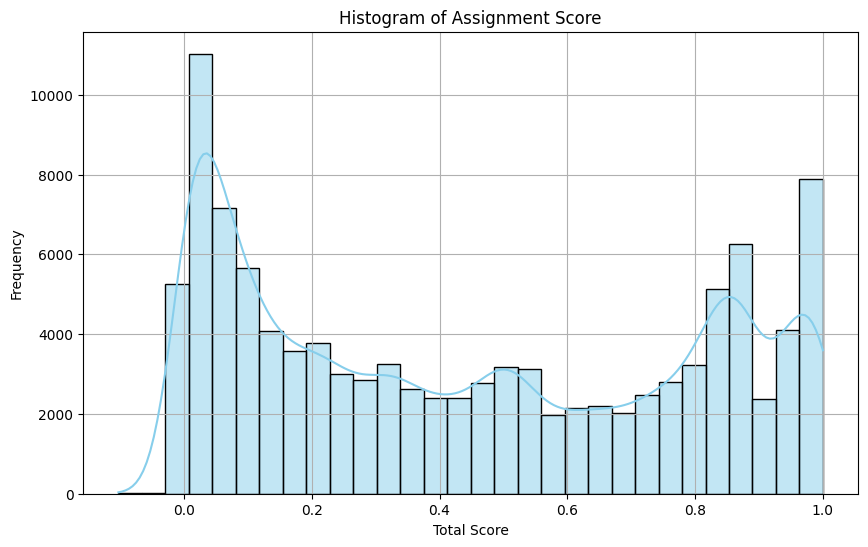

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(user_course_score['avg_score'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Assignment Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
user_course_score[user_course_score['avg_score']>1]['avg_score'] = 1

## Trích xuất điểm từ bài kiểm tra cuối khóa

In [17]:
final_exam_score = pd.read_csv("/kaggle/input/score-final-exam/user_score.csv")
final_exam_score

,user_id,course_id,exam_resources,percentage_score_completed,final_score
0,U_10000,C_2033958,['Ex_7007081'],[nan],0.00000
1,U_1000979,C_947149,['Ex_6019082'],[nan],0.00000
2,U_1000982,C_947149,['Ex_6019082'],[nan],0.00000
3,U_1001176,C_947149,['Ex_6019082'],[nan],0.00000
4,U_10074612,C_735342,['Ex_1366726'],[nan],0.00000
...,...,...,...,...,...
10200,U_9932630,C_1862240,['Ex_7891977'],[0.7435897435897436],0.74359
10201,U_9933524,C_948103,['Ex_1466575'],[nan],0.00000
10202,U_9940546,C_817691,['Ex_1255836'],[nan],0.00000
10203,U_994080,C_947149,['Ex_6019082'],[nan],0.00000


In [18]:
user_course_score = user_course_score.merge(final_exam_score[['user_id', 'course_id', 'final_score']], 
                                           on=['user_id', 'course_id'], how='left')
user_course_score

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,avg_score,final_score
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65,0.005495,0.0
1,U_1000129,云南民族大学,C_1925903,2020-09-06,0,0.0,56,31,7,[],0,1,1.0,70.0,30.0,0.0,1.0,0,2020-08-12,2020-12-31,141.0,116,NaN,NaN
2,U_1000129,云南民族大学,C_1992970,2020-09-06,1,0.0,80,28,7,[],0,0,1.0,70.0,30.0,0.0,1.0,0,2020-08-27,2020-12-31,126.0,116,NaN,NaN
3,U_1000129,云南民族大学,C_680884,2020-10-16,2,960.0,63,6,6,[],0,0,1.0,80.0,20.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,76,NaN,NaN
4,U_1000342,云南民族大学,C_697791,2020-02-28,0,0.0,114,48,8,['计算机科学与技术'],1,0,0.0,80.0,20.0,0.0,1.0,0,2020-01-20,2020-07-31,193.0,154,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459723,U_999821,北京科技大学,C_1774965,2020-05-02,4,1968.0,44,4,4,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-04-27,2021-08-31,491.0,486,NaN,NaN
2459724,U_999856,北京科技大学,C_696724,2020-02-23,0,0.0,86,60,21,['数学'],1,2,1.0,80.0,20.0,0.0,1.0,0,2019-11-18,2020-02-29,103.0,6,NaN,NaN
2459725,U_999856,北京科技大学,C_696827,2020-02-25,1,48.0,43,52,9,['数学'],1,1,1.0,70.0,30.0,0.0,1.0,0,2019-12-25,2020-03-31,97.0,35,NaN,NaN
2459726,U_999856,北京科技大学,C_947252,2020-03-01,2,120.0,56,7,8,[],0,0,1.0,55.0,10.0,35.0,1.0,1,2020-02-17,2020-07-31,165.0,152,NaN,NaN


In [19]:
user_course_score[user_course_score['avg_score']>1]

,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,avg_score,final_score


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


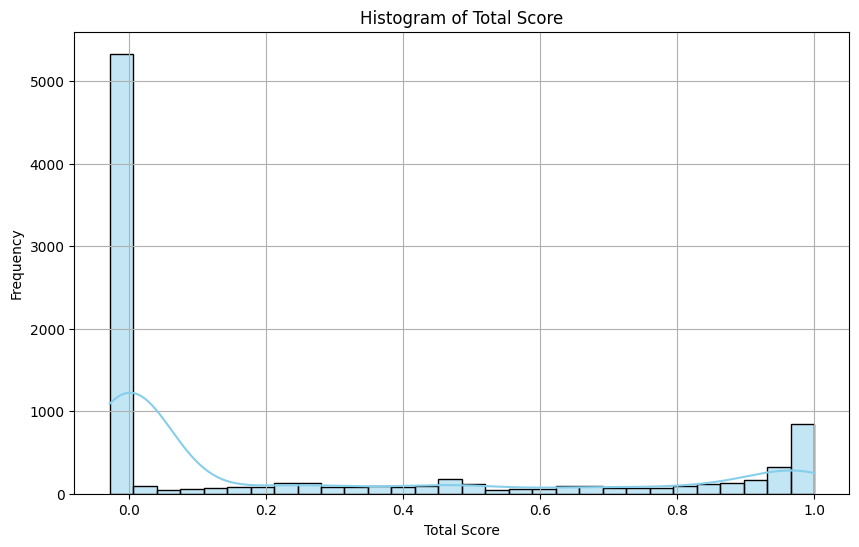

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(user_course_score['final_score'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
user_course_score[user_course_score['final_score']>1]

,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,avg_score,final_score


## Trích xuất điểm từ việc xem video

In [22]:
video_score = pd.read_parquet('/kaggle/input/user-video-all-phases/uv_general')  

In [23]:
video_score.rename(columns={
    'unique_course': 'course_id'
}, inplace=True)
video_score

,user_id,ccid,video_watch_count,course_id,total_videos_for_user,video_watched_percentage,video_percentage_watch_time,video_speed_avg,video_time_between_views,video_time_between_views_avg,video_time_between_views_std,video_pause_count,video_pause_avg,video_pause_std,video_rewatch_count,video_rewatch_avg,video_rewatch_std,entropy_time
0,U_30097980,[55D91151C792DB609C33DC5901307461],1,1829948,38,2.631579,20.670735,1.000000,[[7.200000000000003]],7.200000,0.000000,2,2.000000,0.000000,[0],0.000000,0.000000,0.785248
1,U_13683725,"[30BB198AD98E3C0E9C33DC5901307461, E62F36210A8...",6,697791,114,5.263158,26.321141,1.888889,"[[5.000000000000002, 44.549], [-36.30000000000...",39.814900,50.034622,15,2.500000,1.048809,"[0, 1, 0, 0, 0, 0]",0.166667,0.408248,0.851125
2,U_31112170,"[57C46EB7972D07DD9C33DC5901307461, 0EB3D961F21...",4,1741511,38,10.526316,44.863801,1.000000,"[[0.0], [-59.49999999999999, 33.8, 30.19999999...",11.245455,31.875519,13,2.166667,2.041241,"[0, 1, 0, 0, 0, 1]",0.333333,0.516398,0.529632
3,U_34532881,"[974DAC1C913C49609C33DC5901307461, BD60D064F03...",2,936971,38,5.263158,45.537495,2.000000,"[[0.0], [0.0]]",0.000000,0.000000,2,1.000000,0.000000,"[0, 0]",0.000000,0.000000,0.000000
4,U_34300727,[E468DF2F533540319C33DC5901307461],1,936971,38,2.631579,79.512324,2.000000,"[[109.0, -363.0]]",-127.000000,333.754401,3,3.000000,0.000000,[1],1.000000,0.000000,0.332357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54399,U_17581591,[30BB198AD98E3C0E9C33DC5901307461],1,697791,114,0.877193,5.927523,1.000000,[[0.0]],0.000000,0.000000,1,1.000000,0.000000,[0],0.000000,0.000000,0.000000
54400,U_23432229,"[30BB198AD98E3C0E9C33DC5901307461, AA7510300E0...",4,697791,114,3.508772,21.261789,1.000000,"[[10.0, -203.0, 226.0, 10.0], [10.0, 10.0, 10....",10.692308,87.865792,15,3.750000,3.403430,"[1, 0, 0, 0]",0.250000,0.500000,0.985230
54401,U_16388429,"[30BB198AD98E3C0E9C33DC5901307461, E62F36210A8...",2,697791,114,1.754386,50.205360,1.000000,"[[40.0, 135.0, 85.0, 55.0, 75.0, 25.0, 30.0], ...",55.625000,42.210146,9,4.500000,4.949747,"[0, 0]",0.000000,0.000000,1.473851
54402,U_24556708,"[30BB198AD98E3C0E9C33DC5901307461, 3F0F70E858E...",3,697791,114,2.631579,8.579452,1.000000,"[[293.1], [320.0, 65.0], [30.0, 65.10000000000...",133.866667,134.943628,9,3.000000,1.000000,"[0, 0, 0]",0.000000,0.000000,1.344806


In [24]:
video_score['course_id'] = 'C_' + video_score['course_id'].astype(str)
video_score

,user_id,ccid,video_watch_count,course_id,total_videos_for_user,video_watched_percentage,video_percentage_watch_time,video_speed_avg,video_time_between_views,video_time_between_views_avg,video_time_between_views_std,video_pause_count,video_pause_avg,video_pause_std,video_rewatch_count,video_rewatch_avg,video_rewatch_std,entropy_time
0,U_30097980,[55D91151C792DB609C33DC5901307461],1,C_1829948,38,2.631579,20.670735,1.000000,[[7.200000000000003]],7.200000,0.000000,2,2.000000,0.000000,[0],0.000000,0.000000,0.785248
1,U_13683725,"[30BB198AD98E3C0E9C33DC5901307461, E62F36210A8...",6,C_697791,114,5.263158,26.321141,1.888889,"[[5.000000000000002, 44.549], [-36.30000000000...",39.814900,50.034622,15,2.500000,1.048809,"[0, 1, 0, 0, 0, 0]",0.166667,0.408248,0.851125
2,U_31112170,"[57C46EB7972D07DD9C33DC5901307461, 0EB3D961F21...",4,C_1741511,38,10.526316,44.863801,1.000000,"[[0.0], [-59.49999999999999, 33.8, 30.19999999...",11.245455,31.875519,13,2.166667,2.041241,"[0, 1, 0, 0, 0, 1]",0.333333,0.516398,0.529632
3,U_34532881,"[974DAC1C913C49609C33DC5901307461, BD60D064F03...",2,C_936971,38,5.263158,45.537495,2.000000,"[[0.0], [0.0]]",0.000000,0.000000,2,1.000000,0.000000,"[0, 0]",0.000000,0.000000,0.000000
4,U_34300727,[E468DF2F533540319C33DC5901307461],1,C_936971,38,2.631579,79.512324,2.000000,"[[109.0, -363.0]]",-127.000000,333.754401,3,3.000000,0.000000,[1],1.000000,0.000000,0.332357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54399,U_17581591,[30BB198AD98E3C0E9C33DC5901307461],1,C_697791,114,0.877193,5.927523,1.000000,[[0.0]],0.000000,0.000000,1,1.000000,0.000000,[0],0.000000,0.000000,0.000000
54400,U_23432229,"[30BB198AD98E3C0E9C33DC5901307461, AA7510300E0...",4,C_697791,114,3.508772,21.261789,1.000000,"[[10.0, -203.0, 226.0, 10.0], [10.0, 10.0, 10....",10.692308,87.865792,15,3.750000,3.403430,"[1, 0, 0, 0]",0.250000,0.500000,0.985230
54401,U_16388429,"[30BB198AD98E3C0E9C33DC5901307461, E62F36210A8...",2,C_697791,114,1.754386,50.205360,1.000000,"[[40.0, 135.0, 85.0, 55.0, 75.0, 25.0, 30.0], ...",55.625000,42.210146,9,4.500000,4.949747,"[0, 0]",0.000000,0.000000,1.473851
54402,U_24556708,"[30BB198AD98E3C0E9C33DC5901307461, 3F0F70E858E...",3,C_697791,114,2.631579,8.579452,1.000000,"[[293.1], [320.0, 65.0], [30.0, 65.10000000000...",133.866667,134.943628,9,3.000000,1.000000,"[0, 0, 0]",0.000000,0.000000,1.344806


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


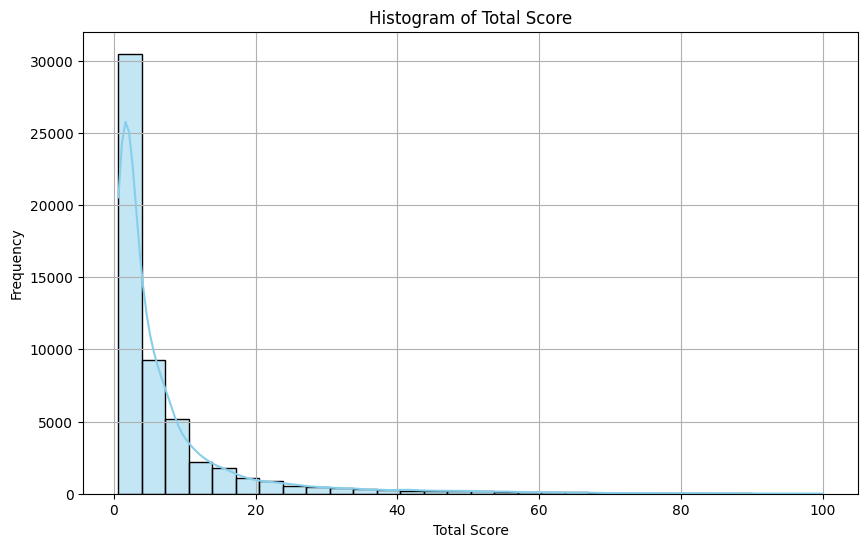

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(video_score['video_watched_percentage'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
user_course_score = user_course_score.merge(video_score[['user_id', 'course_id', 'video_watched_percentage']], 
                                           on=['user_id', 'course_id'], how='left')
user_course_score

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,avg_score,final_score,video_watched_percentage
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65,0.005495,0.0,NaN
1,U_1000129,云南民族大学,C_1925903,2020-09-06,0,0.0,56,31,7,[],0,1,1.0,70.0,30.0,0.0,1.0,0,2020-08-12,2020-12-31,141.0,116,NaN,NaN,NaN
2,U_1000129,云南民族大学,C_1992970,2020-09-06,1,0.0,80,28,7,[],0,0,1.0,70.0,30.0,0.0,1.0,0,2020-08-27,2020-12-31,126.0,116,NaN,NaN,NaN
3,U_1000129,云南民族大学,C_680884,2020-10-16,2,960.0,63,6,6,[],0,0,1.0,80.0,20.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,76,NaN,NaN,NaN
4,U_1000342,云南民族大学,C_697791,2020-02-28,0,0.0,114,48,8,['计算机科学与技术'],1,0,0.0,80.0,20.0,0.0,1.0,0,2020-01-20,2020-07-31,193.0,154,NaN,NaN,1.754386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459723,U_999821,北京科技大学,C_1774965,2020-05-02,4,1968.0,44,4,4,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-04-27,2021-08-31,491.0,486,NaN,NaN,NaN
2459724,U_999856,北京科技大学,C_696724,2020-02-23,0,0.0,86,60,21,['数学'],1,2,1.0,80.0,20.0,0.0,1.0,0,2019-11-18,2020-02-29,103.0,6,NaN,NaN,NaN
2459725,U_999856,北京科技大学,C_696827,2020-02-25,1,48.0,43,52,9,['数学'],1,1,1.0,70.0,30.0,0.0,1.0,0,2019-12-25,2020-03-31,97.0,35,NaN,NaN,NaN
2459726,U_999856,北京科技大学,C_947252,2020-03-01,2,120.0,56,7,8,[],0,0,1.0,55.0,10.0,35.0,1.0,1,2020-02-17,2020-07-31,165.0,152,NaN,NaN,NaN


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


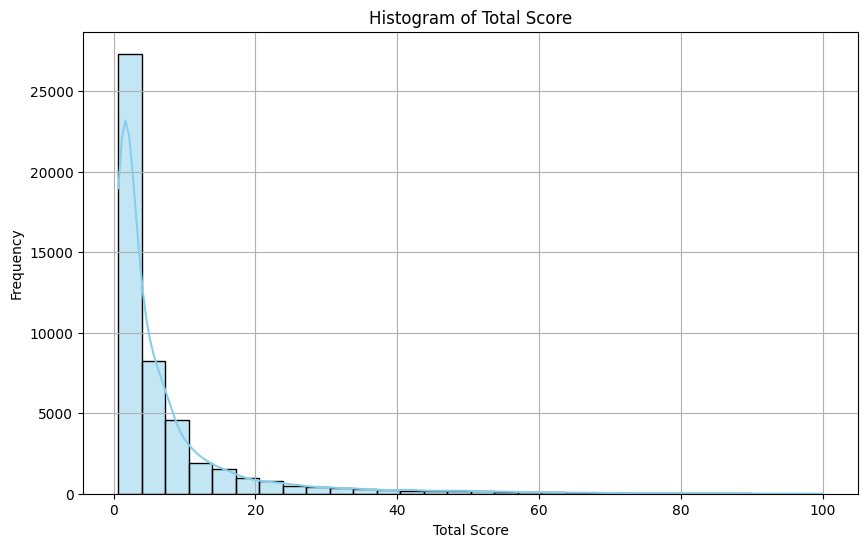

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(user_course_score['video_watched_percentage'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
user_course_score['video_watched_percentage'] = user_course_score['video_watched_percentage'] / 100
user_course_score

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,avg_score,final_score,video_watched_percentage
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65,0.005495,0.0,NaN
1,U_1000129,云南民族大学,C_1925903,2020-09-06,0,0.0,56,31,7,[],0,1,1.0,70.0,30.0,0.0,1.0,0,2020-08-12,2020-12-31,141.0,116,NaN,NaN,NaN
2,U_1000129,云南民族大学,C_1992970,2020-09-06,1,0.0,80,28,7,[],0,0,1.0,70.0,30.0,0.0,1.0,0,2020-08-27,2020-12-31,126.0,116,NaN,NaN,NaN
3,U_1000129,云南民族大学,C_680884,2020-10-16,2,960.0,63,6,6,[],0,0,1.0,80.0,20.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,76,NaN,NaN,NaN
4,U_1000342,云南民族大学,C_697791,2020-02-28,0,0.0,114,48,8,['计算机科学与技术'],1,0,0.0,80.0,20.0,0.0,1.0,0,2020-01-20,2020-07-31,193.0,154,NaN,NaN,0.017544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459723,U_999821,北京科技大学,C_1774965,2020-05-02,4,1968.0,44,4,4,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-04-27,2021-08-31,491.0,486,NaN,NaN,NaN
2459724,U_999856,北京科技大学,C_696724,2020-02-23,0,0.0,86,60,21,['数学'],1,2,1.0,80.0,20.0,0.0,1.0,0,2019-11-18,2020-02-29,103.0,6,NaN,NaN,NaN
2459725,U_999856,北京科技大学,C_696827,2020-02-25,1,48.0,43,52,9,['数学'],1,1,1.0,70.0,30.0,0.0,1.0,0,2019-12-25,2020-03-31,97.0,35,NaN,NaN,NaN
2459726,U_999856,北京科技大学,C_947252,2020-03-01,2,120.0,56,7,8,[],0,0,1.0,55.0,10.0,35.0,1.0,1,2020-02-17,2020-07-31,165.0,152,NaN,NaN,NaN


In [29]:
user_course_score_limit = user_course_score.dropna(subset=['avg_score'], how='all')
user_course_score_limit

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,avg_score,final_score,video_watched_percentage
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65,0.005495,0.0,NaN
43,U_1000979,云南大学,C_947149,2020-03-03,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,47,1.000000,0.0,NaN
44,U_1000982,云南大学,C_947149,2020-06-30,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2020-04-20,2020-07-31,102.0,31,0.107692,0.0,NaN
50,U_1001176,云南大学,C_947149,2020-03-02,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,48,0.632234,0.0,NaN
55,U_1001413,昆明理工大学,C_735164,2020-11-26,0,0.0,61,44,8,['外国语言文学'],1,0,1.0,60.0,40.0,0.0,1.0,0,2020-09-01,2020-12-20,110.0,24,0.959470,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459656,U_99746,河南工学院,C_674971,2020-05-13,3,768.0,105,27,29,[],0,0,1.0,60.0,40.0,0.0,1.0,0,2020-02-11,2020-07-31,171.0,79,0.297634,NaN,NaN
2459665,U_997506,哈尔滨工业大学,C_2095102,2020-11-13,3,648.0,36,9,9,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-07,2020-12-31,115.0,48,0.111111,NaN,NaN
2459667,U_99753,安徽财经大学,C_1428968,2020-10-19,0,0.0,49,5,6,[],0,0,0.0,90.0,10.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,73,0.820000,NaN,NaN
2459668,U_997542,成都信息工程大学,C_2066096,2020-09-15,0,0.0,48,6,11,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-04,2020-12-31,118.0,107,0.833333,NaN,NaN


In [30]:
user_course_score_limit[['avg_score', 'final_score', 'video_watched_percentage']] = user_course_score_limit[['avg_score', 'final_score', 'video_watched_percentage']].fillna(0)
user_course_score_limit

/tmp/ipykernel_13/2349656962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_course_score_limit[['avg_score', 'final_score', 'video_watched_percentage']] = user_course_score_limit[['avg_score', 'final_score', 'video_watched_percentage']].fillna(0)


,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,avg_score,final_score,video_watched_percentage
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65,0.005495,0.0,0.0
43,U_1000979,云南大学,C_947149,2020-03-03,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,47,1.000000,0.0,0.0
44,U_1000982,云南大学,C_947149,2020-06-30,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2020-04-20,2020-07-31,102.0,31,0.107692,0.0,0.0
50,U_1001176,云南大学,C_947149,2020-03-02,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,48,0.632234,0.0,0.0
55,U_1001413,昆明理工大学,C_735164,2020-11-26,0,0.0,61,44,8,['外国语言文学'],1,0,1.0,60.0,40.0,0.0,1.0,0,2020-09-01,2020-12-20,110.0,24,0.959470,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459656,U_99746,河南工学院,C_674971,2020-05-13,3,768.0,105,27,29,[],0,0,1.0,60.0,40.0,0.0,1.0,0,2020-02-11,2020-07-31,171.0,79,0.297634,0.0,0.0
2459665,U_997506,哈尔滨工业大学,C_2095102,2020-11-13,3,648.0,36,9,9,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-07,2020-12-31,115.0,48,0.111111,0.0,0.0
2459667,U_99753,安徽财经大学,C_1428968,2020-10-19,0,0.0,49,5,6,[],0,0,0.0,90.0,10.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,73,0.820000,0.0,0.0
2459668,U_997542,成都信息工程大学,C_2066096,2020-09-15,0,0.0,48,6,11,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-04,2020-12-31,118.0,107,0.833333,0.0,0.0


In [31]:
user_course_score_limit.rename(columns={
    'avg_score': 'assignment_score',
    'final_score': 'final_exam_score',
    'video_watched_percentage': 'video_score',
}, inplace=True)
user_course_score_limit

/tmp/ipykernel_13/3786138547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_course_score_limit.rename(columns={


,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,assignment_score,final_exam_score,video_score
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65,0.005495,0.0,0.0
43,U_1000979,云南大学,C_947149,2020-03-03,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,47,1.000000,0.0,0.0
44,U_1000982,云南大学,C_947149,2020-06-30,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2020-04-20,2020-07-31,102.0,31,0.107692,0.0,0.0
50,U_1001176,云南大学,C_947149,2020-03-02,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,48,0.632234,0.0,0.0
55,U_1001413,昆明理工大学,C_735164,2020-11-26,0,0.0,61,44,8,['外国语言文学'],1,0,1.0,60.0,40.0,0.0,1.0,0,2020-09-01,2020-12-20,110.0,24,0.959470,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459656,U_99746,河南工学院,C_674971,2020-05-13,3,768.0,105,27,29,[],0,0,1.0,60.0,40.0,0.0,1.0,0,2020-02-11,2020-07-31,171.0,79,0.297634,0.0,0.0
2459665,U_997506,哈尔滨工业大学,C_2095102,2020-11-13,3,648.0,36,9,9,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-07,2020-12-31,115.0,48,0.111111,0.0,0.0
2459667,U_99753,安徽财经大学,C_1428968,2020-10-19,0,0.0,49,5,6,[],0,0,0.0,90.0,10.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,73,0.820000,0.0,0.0
2459668,U_997542,成都信息工程大学,C_2066096,2020-09-15,0,0.0,48,6,11,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-04,2020-12-31,118.0,107,0.833333,0.0,0.0


In [32]:
#    user_course_score_limit['video'] * user_course_score_limit['video_score'] +

In [33]:
user_course_score_limit['total_score'] = (
    user_course_score_limit['assignment'] * user_course_score_limit['assignment_score'] +
    user_course_score_limit['video_score'] * user_course_score_limit['video'] +
    user_course_score_limit['exam'] * user_course_score_limit['final_exam_score']
)
user_course_score_limit

/tmp/ipykernel_13/1693425527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_course_score_limit['total_score'] = (


,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,assignment_score,final_exam_score,video_score,total_score
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65,0.005495,0.0,0.0,0.219780
43,U_1000979,云南大学,C_947149,2020-03-03,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,47,1.000000,0.0,0.0,55.000000
44,U_1000982,云南大学,C_947149,2020-06-30,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2020-04-20,2020-07-31,102.0,31,0.107692,0.0,0.0,5.923077
50,U_1001176,云南大学,C_947149,2020-03-02,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,48,0.632234,0.0,0.0,34.772894
55,U_1001413,昆明理工大学,C_735164,2020-11-26,0,0.0,61,44,8,['外国语言文学'],1,0,1.0,60.0,40.0,0.0,1.0,0,2020-09-01,2020-12-20,110.0,24,0.959470,0.0,0.0,57.568182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459656,U_99746,河南工学院,C_674971,2020-05-13,3,768.0,105,27,29,[],0,0,1.0,60.0,40.0,0.0,1.0,0,2020-02-11,2020-07-31,171.0,79,0.297634,0.0,0.0,17.858063
2459665,U_997506,哈尔滨工业大学,C_2095102,2020-11-13,3,648.0,36,9,9,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-07,2020-12-31,115.0,48,0.111111,0.0,0.0,8.888889
2459667,U_99753,安徽财经大学,C_1428968,2020-10-19,0,0.0,49,5,6,[],0,0,0.0,90.0,10.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,73,0.820000,0.0,0.0,73.800000
2459668,U_997542,成都信息工程大学,C_2066096,2020-09-15,0,0.0,48,6,11,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-04,2020-12-31,118.0,107,0.833333,0.0,0.0,66.666667


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


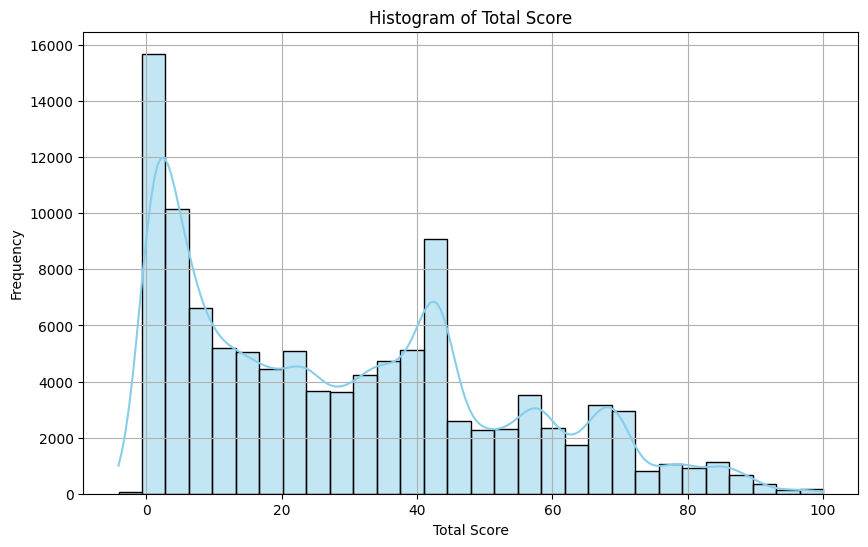

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(user_course_score_limit['total_score'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [35]:
def assign_grade(score):
    if 85 <= score <= 100:
        return 'A'
    elif 70 <= score < 85:
        return 'B'
    elif 60 <= score < 70:
        return 'C'
    elif 30 <= score < 60:
        return 'D'
    elif score < 30:
        return 'E'

# Gán nhãn vào cột mới 'grade'
user_course_score_limit['label'] = user_course_score_limit['total_score'].apply(assign_grade)

/tmp/ipykernel_13/1728062734.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_course_score_limit['label'] = user_course_score_limit['total_score'].apply(assign_grade)


In [36]:
user_course_score_limit

,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course,video_count,exercise_count,chapter_count,field_x,num_field_x,num_prerequisites,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days,remaining_time,assignment_score,final_exam_score,video_score,total_score,label
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0,61,14,14,[],0,0,1.0,40.0,30.0,30.0,1.0,1,2020-09-04,2020-12-31,118.0,65,0.005495,0.0,0.0,0.219780,E
43,U_1000979,云南大学,C_947149,2020-03-03,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,47,1.000000,0.0,0.0,55.000000,D
44,U_1000982,云南大学,C_947149,2020-06-30,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2020-04-20,2020-07-31,102.0,31,0.107692,0.0,0.0,5.923077,E
50,U_1001176,云南大学,C_947149,2020-03-02,0,0.0,20,14,8,[],0,2,1.0,55.0,10.0,35.0,1.0,1,2019-12-30,2020-04-19,111.0,48,0.632234,0.0,0.0,34.772894,D
55,U_1001413,昆明理工大学,C_735164,2020-11-26,0,0.0,61,44,8,['外国语言文学'],1,0,1.0,60.0,40.0,0.0,1.0,0,2020-09-01,2020-12-20,110.0,24,0.959470,0.0,0.0,57.568182,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459656,U_99746,河南工学院,C_674971,2020-05-13,3,768.0,105,27,29,[],0,0,1.0,60.0,40.0,0.0,1.0,0,2020-02-11,2020-07-31,171.0,79,0.297634,0.0,0.0,17.858063,E
2459665,U_997506,哈尔滨工业大学,C_2095102,2020-11-13,3,648.0,36,9,9,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-07,2020-12-31,115.0,48,0.111111,0.0,0.0,8.888889,E
2459667,U_99753,安徽财经大学,C_1428968,2020-10-19,0,0.0,49,5,6,[],0,0,0.0,90.0,10.0,0.0,1.0,0,2020-09-01,2020-12-31,121.0,73,0.820000,0.0,0.0,73.800000,B
2459668,U_997542,成都信息工程大学,C_2066096,2020-09-15,0,0.0,48,6,11,[],0,0,0.0,80.0,20.0,0.0,1.0,0,2020-09-04,2020-12-31,118.0,107,0.833333,0.0,0.0,66.666667,C


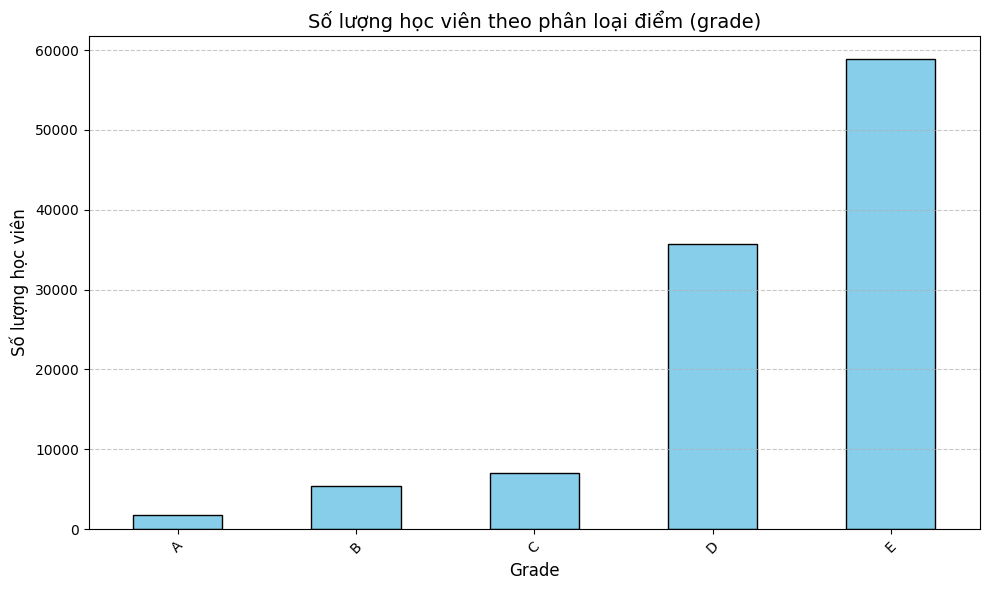

In [37]:
# Đếm số lượng mỗi loại grade
grade_counts = user_course_score_limit['label'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Số lượng học viên theo phân loại điểm (grade)', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Số lượng học viên', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [38]:
user_course_score_limit.to_csv("user_label.csv", index = False)